In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable


In [3]:
German=pd.read_csv("german_credit.csv")
German.head()
German.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [4]:
German.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
# Lets build a Ensemble model but need to modify the dataset first
German.shape

(1000, 21)

In [6]:
df = German.select_dtypes(include = np.object)
for c in df.columns:
    print(c,df[c].unique().shape)

account_check_status (4,)
credit_history (5,)
purpose (10,)
savings (5,)
present_emp_since (5,)
personal_status_sex (4,)
other_debtors (3,)
property (4,)
other_installment_plans (3,)
housing (3,)
job (4,)
telephone (2,)
foreign_worker (2,)


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
 for features in German.columns:
    if German[features].dtypes=='object':
        temp = pd.get_dummies(German[features],prefix=features)
        German = German.join(temp)

In [8]:
# Print Shape of model data
German.shape

(1000, 75)

### Check for highly correlated variables but don't required any treatment for this use case

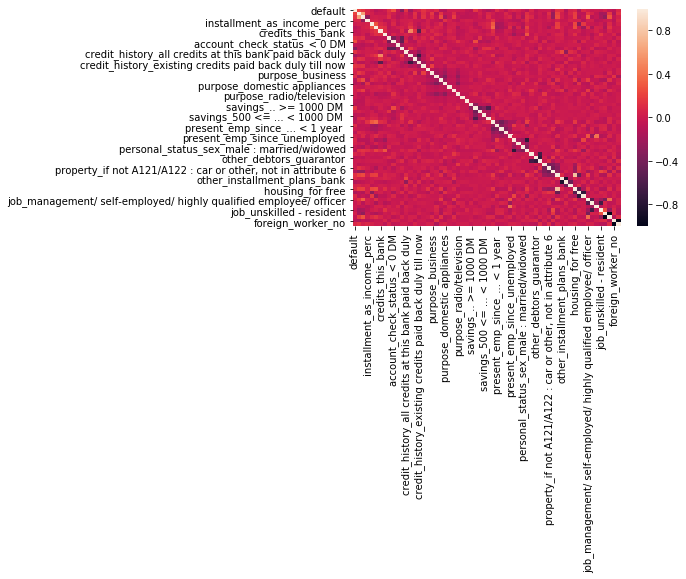

In [9]:
sns.heatmap(German.corr())

### Drop the original variables which are converted to dummy

In [10]:
dff=list(df)
German=German.drop(dff,axis=1) 
German.shape

(1000, 62)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [11]:
from sklearn.model_selection import train_test_split
X=German.drop('default',axis=1)
y=German['default']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((700, 61), (700,), (300, 61), (300,))

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=2,n_estimators=500, criterion="entropy",random_state=9999)
model.fit(X_train,y_train)
y_predict=model.predict(X_test) 
print(model.score(X_test,y_test))

0.7433333333333333


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict)) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

[[197  17]
 [ 60  26]]
Accuracy: 0.7433333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [15]:
feature_importances = pd.DataFrame(model.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.100113
age,0.078122
duration_in_month,0.072037
account_check_status_no checking account,0.044759
installment_as_income_perc,0.036985
present_res_since,0.033360
account_check_status_< 0 DM,0.030929
credit_history_critical account/ other credits existing (not at this bank),0.029383
savings_... < 100 DM,0.020143
credits_this_bank,0.018879


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
# Use below values
num_folds = 10
seed = 77

In [18]:
#Validate the Random Forest model build above using k fold

In [19]:
kfold = KFold(n_splits=num_folds, random_state=seed)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=2,n_estimators=500, criterion="entropy",random_state=9999)

In [20]:
#Calculate Mean score

In [21]:
val_score=cross_val_score(model, X_train, y_train, cv=kfold)
print(val_score)
print(np.mean(val_score))

[0.8        0.71428571 0.84285714 0.75714286 0.72857143 0.71428571
 0.81428571 0.71428571 0.81428571 0.67142857]
0.7571428571428571


In [22]:
# Calculate score standard deviation using std()

In [23]:
val_score.std()

0.05421047417431508

# Q8 Print the confusion matrix( 1 Marks)

In [26]:
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier(n_jobs=2,n_estimators=500, criterion="entropy",random_state=9999)
grid = {'n_estimators': [100]}
cv = KFold(n_splits = 10, shuffle=True, random_state =77)
clf = GridSearchCV(model1, grid, n_jobs=2, cv=cv,scoring='accuracy')
clf.fit(X_train, y_train)

prediction = clf.predict(X_test) # predicting on the validation set
confusion_matrix(y_test, prediction)

array([[197,  17],
       [ 62,  24]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       214
           1       0.59      0.28      0.38        86

    accuracy                           0.74       300
   macro avg       0.67      0.60      0.61       300
weighted avg       0.71      0.74      0.70       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [64]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [65]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [66]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7473333333333334
Standard deviation:  0.01756258649642599
